In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from __future__ import division
import pylab

First a simple data loading function.

In [2]:
# load data
def load_data():
    data = np.array(np.genfromtxt('noisy_sin_samples.csv', delimiter=','))
    x = np.reshape(data[:,0],(np.size(data[:,0]),1))
    y = np.reshape(data[:,1],(np.size(data[:,1]),1))
    return x,y

Now we need a function to transform input features into Fourier features.

In [3]:
# YOUR CODE GOES HERE takes poly features of the input 
def poly_features(x,D):
    F = []

    return F

Now we need a variety of plotting functions - to plot our datapoints, polynomial models, and errors.

In [8]:
# plot the polynomial  
def plot_model(w,D):
    # plot determined surface in 3d space
    s = np.arange(0,1,.01)
    f = poly_features(s,D)
    z = np.dot(f.T,w)

    # plot contour in original space
    plt.plot(s,z, color = 'r', linewidth = 2)
    plt.ylim([-1.5,1.5])
    plt.xlim([0,1])

# plot mse's over all D tested 
def plot_mse(mses,deg):
    plt.plot(np.arange(1,np.size(mses)+1),mses,'ro--')
    plt.title('MSE on entire dataset in D', fontsize=18)
    plt.xlabel('degree D', fontsize=18)
    plt.ylabel('MSE       ', fontsize=18)

# plot data 
def plot_data(x,y,deg):
    for i in np.arange(1,7):
        plt.subplot(2,3,i)
        plt.scatter(x,y,s = 30, color = 'k')

        # graph info labels
        s = 'D = ' + str(deg[i-1])
        plt.title(s, fontsize=15)
        plt.axis('off')

Now, a function to loop through the degrees we wish to test and trains a model for each, plotting the resulting fit to the dataset and error.

In [9]:
# run over all the degrees, fit each models, and calculate errors
def try_all_degs(x,y,deg_range):
    # plot datapoints - one panel for each deg in deg_range
    fig = plt.figure(figsize = (8,4))
    plot_data(x,y,deg_range)

    # generate nonlinear features
    mses = []

    for D in np.arange(0,np.size(deg_range)):
        # generate poly feature transformation
        F = poly_features(x,deg_range[D])

        # get weights for current model
        temp = np.linalg.pinv(np.dot(F,F.T))
        w = np.dot(np.dot(temp,F),y)
        MSE = np.linalg.norm(np.dot(F.T,w)-y)/np.size(y)
        mses.append(MSE)

        # plot fit to data
        plt.subplot(2,3,D+1)
        plot_model(w,deg_range[D])

    # make plot of mse's
    fig = plt.figure(figsize = (5,5))
    plot_mse(mses,deg_range)
    plt.show()

Now that everything is defined, lets run all.

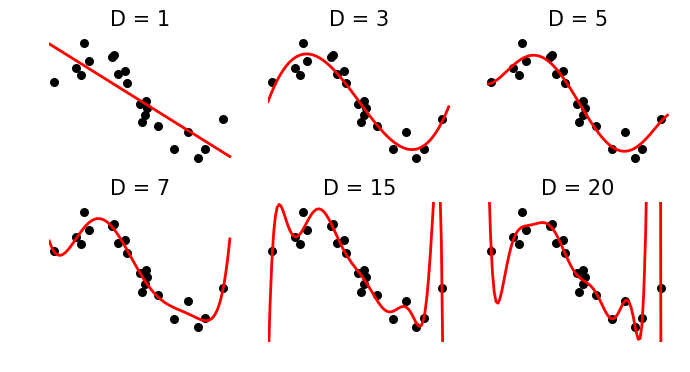

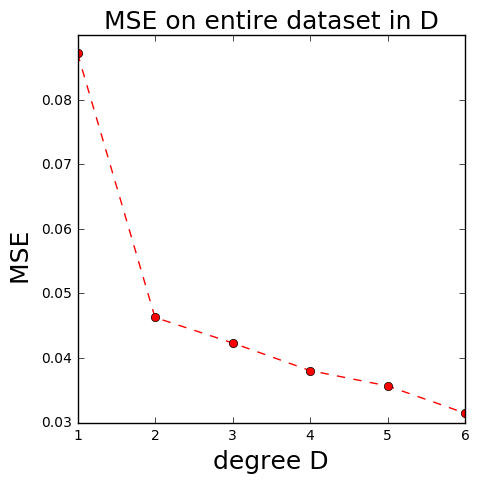

In [10]:
# load data and defined degree range
x, y = load_data()
deg_range = [1,3,5,7,15,20]           # degree polys to try

# run all over degree range
try_all_degs(x,y,deg_range)